In [2]:
%pylab inline
import pandas as pd

import numpy as np
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_pickle('../data/kal_returnsDF.pkl')
symbolsDF = pd.read_pickle('../data/symbolsDF.pkl')

In [ ]:
# turn 0 to NaN

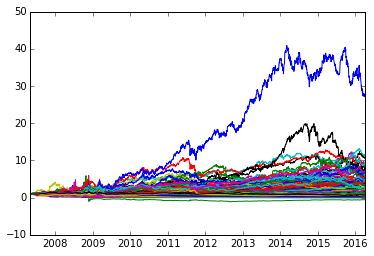

In [4]:
#plot all individual eq curves
for column in df.columns:
    plot(df.index,np.cumprod(df[column]+1))

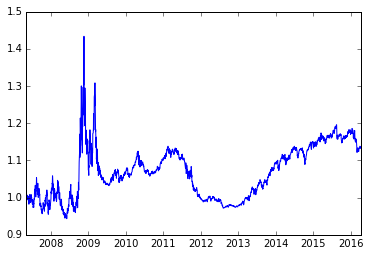

In [5]:
# plot portfolio eq curve
ser=df.mean(axis=1)
plot(ser.index,np.cumprod(ser+1))

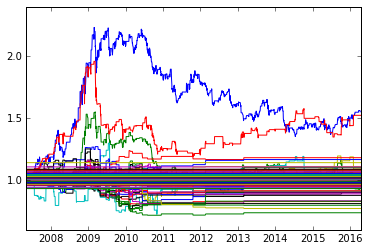

In [32]:
# plot individual limited by recent performance
data = df.copy()
for column in data.columns:
    data[pd.rolling_sum(data[column].shift(1), 6)>0]=0
    plot(data.index,np.cumprod(data[column]+1))

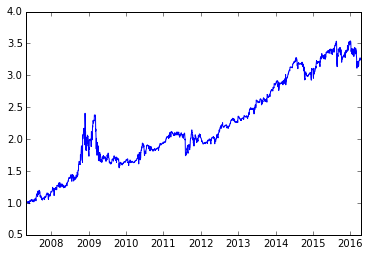

In [34]:
# plot portfolio limited by recent performance
data = df.copy()
data[pd.rolling_sum(data.shift(1), 6)>0]=0
ser=data.mean(axis=1)
plot(ser.index,np.cumprod(ser*3+1))

In [8]:
sectors = symbolsDF.sector.unique().tolist()

telecommunications_services


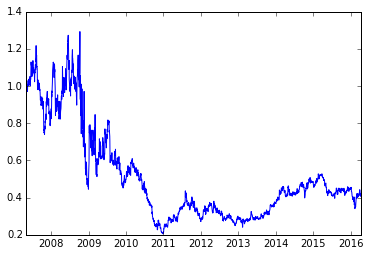

energy


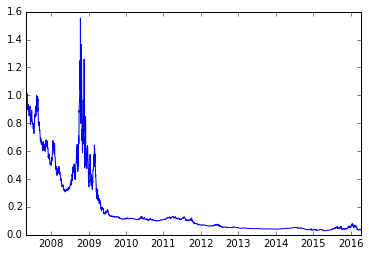

information_technology


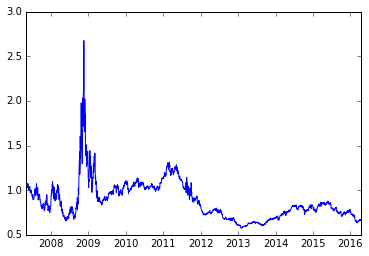

utilities


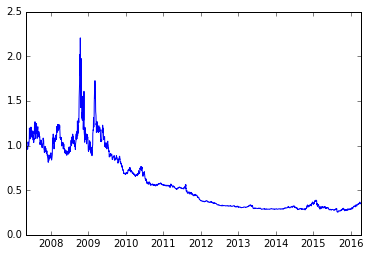

materials


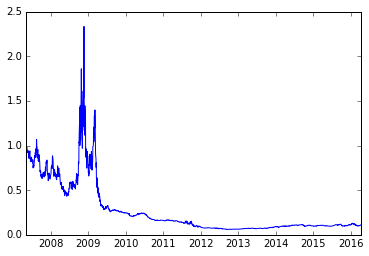

consumer_staples


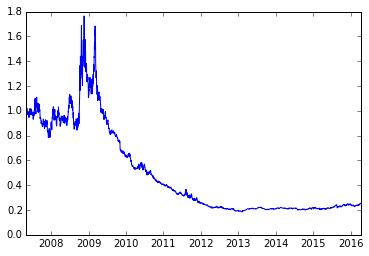

financials


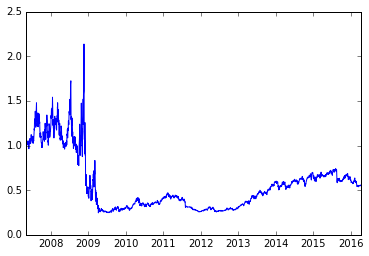

health_care


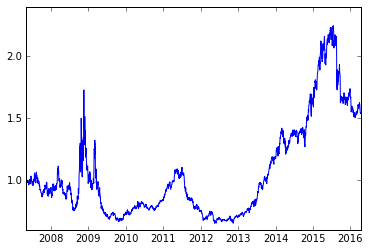

industrials


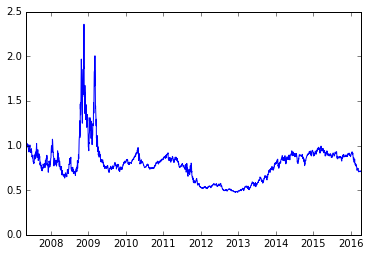

consumer_discretionary


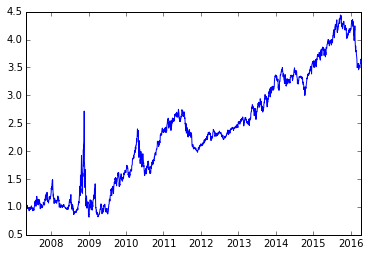

In [36]:
# plot sectors 
for sector_ in sectors:
    print(sector_)
    ls = symbolsDF[symbolsDF.sector==sector_].index
    try:
        ser = df[ls].mean(axis=1)
    except:
        ser = df[ls.drop('WLTW')].mean(axis=1)
    plot(ser.index,np.cumprod(ser*3+1))
    show()


telecommunications_services


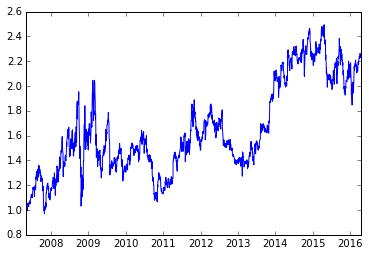

energy


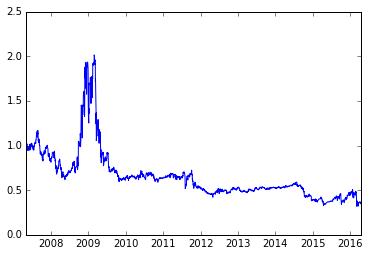

information_technology


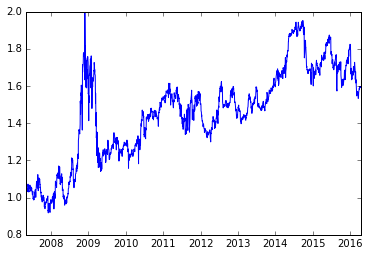

utilities


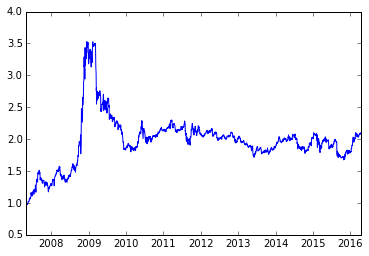

materials


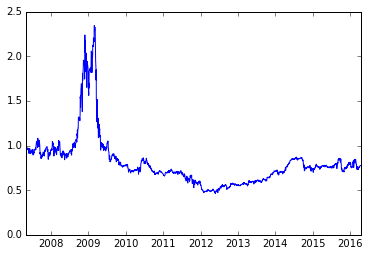

consumer_staples


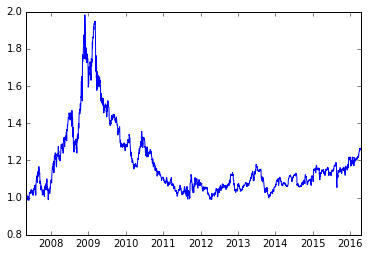

financials


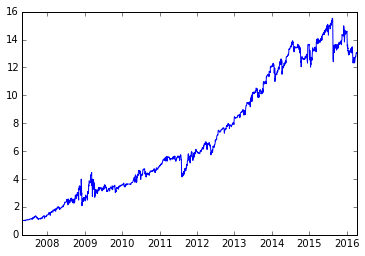

health_care


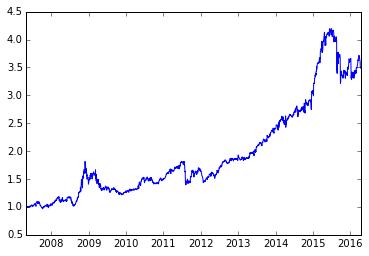

industrials


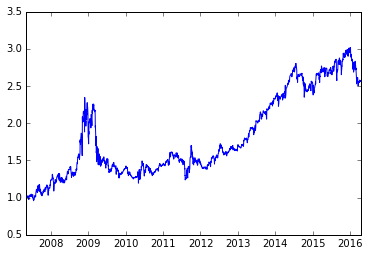

consumer_discretionary


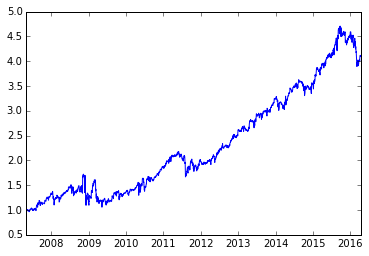

In [37]:
# sectors limited by recent performance
data = df.copy()
data[pd.rolling_sum(data.shift(1), 6)>0]=0
for sector_ in sectors:
    print(sector_)
    ls = symbolsDF[symbolsDF.sector==sector_].index
    try:
        ser = data[ls].mean(axis=1)
    except:
        ser = data[ls.drop('WLTW')].mean(axis=1)
    #print(ser)
    plot(ser.index,np.cumprod(ser*3+1))
    show()

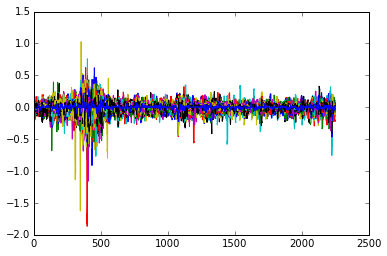

/Users/liamconnell/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


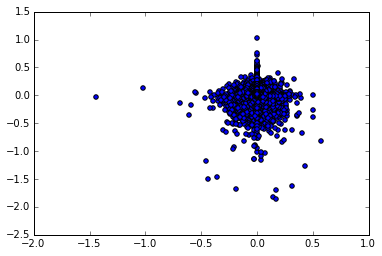

In [29]:
rol_ = pd.rolling_sum(data.shift(1), 6)
plot(data['GS'])
plot(rol_)
show()
plt.scatter(data, rol_)
plt.a